<a href="https://colab.research.google.com/github/TDoi-99726/statistical_learning_with_python/blob/master/IPW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import pandas as pd
from dfply import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import datetime 

In [ ]:
tv = pd.read_csv('tv.csv')
SCI_2019 = pd.read_csv('SCItv_2019.csv')
SCI_2020 = pd.read_csv('SCItv_2020.csv')
sci = pd.read_csv('tv_sci.csv')
sci['purchase_date'] = pd.to_datetime(sci['purchase_date'], format='%Y-%m-%d')

テレビ関係のデータ作成

In [ ]:
tv["per"] = tv["watch_min"] / tv["program_min"]

In [ ]:
tv_g = tv[tv['program_name'] == 'ガッテン！' ]
tv_g = tv_g[tv_g['per'] > 0.1]
ga = list(set(tv_g['tv_watch_date'].tolist()))
ga = pd.DataFrame({'tv_watch_date':ga})

tv_t = tv[tv['program_name'].str.contains ('たけしの家庭の医学')]
tv_t = tv_t[tv_t['per'] > 0.1]
t = list(set(tv_t['tv_watch_date'].tolist()))
t = pd.DataFrame({'tv_watch_date':t})

tv_m = tv[tv['program_name'] == 'マツコの知らない世界' ]
tv_m = tv_m[tv_m['per'] > 0.1]
m = list(set(tv_m['tv_watch_date'].tolist()))
m = pd.DataFrame({'tv_watch_date':m})

tv_c = tv[tv['program_name'].str.contains ( 'カンブリア' )]
tv_c = tv_c[tv_c['per'] > 0.1]
c = list(set(tv_c['tv_watch_date'].tolist()))
c = pd.DataFrame({'tv_watch_date':c})

tv_j = tv[tv['program_name'] == 'ジョブチューン' ]
tv_j = tv_j[tv_j['per'] > 0.1]
j = list(set(tv_j['tv_watch_date'].tolist()))
j = pd.DataFrame({'tv_watch_date':j})

In [ ]:
def g_2019i(ts,name):
    tv_mtest = tv_g[tv_g['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2019[SCI_2019['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2019, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def g_2020i(ts,name):
    tv_mtest = tv_g[tv_g['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2020[SCI_2020['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2020, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def m_2019i(ts,name):
    tv_mtest = tv_m[tv_m['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2019[SCI_2019['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2019, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def m_2020i(ts,name):
    tv_mtest = tv_m[tv_m['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2020[SCI_2020['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2020, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def t_2019i(ts,name):
    tv_mtest = tv_t[tv_t['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2019[SCI_2019['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2019, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def t_2020i(ts,name):
    tv_mtest = tv_t[tv_t['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2020[SCI_2020['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2020, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def c_2019i(ts,name):
    tv_mtest = tv_c[tv_c['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2019[SCI_2019['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2019, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def c_2020i(ts,name):
    tv_mtest = tv_c[tv_c['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2020[SCI_2020['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2020, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def j_2019i(ts,name):
    tv_mtest = tv_j[tv_j['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2019[SCI_2019['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2019, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def j_2020i(ts,name):
    tv_mtest = tv_j[tv_j['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2020[SCI_2020['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2020, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['item_name'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def c_2019b(ts,name):
    tv_mtest = tv_c[tv_c['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2019[SCI_2019['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2019, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['maker'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def c_2020i(ts,name):
    tv_mtest = tv_c[tv_c['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2020[SCI_2020['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2020, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['maker'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def j_2019b(ts,name):
    tv_mtest = tv_c[tv_c['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2019[SCI_2019['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2019, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['maker'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

In [ ]:
def j_2020i(ts,name):
    tv_mtest = tv_c[tv_c['tv_watch_date'] == ts ].sort_values('monitor_code')
    code_mtest = pd.DataFrame({'monitor_code':(tv_mtest['monitor_code'].tolist())})
    #該当番組を視聴した顧客コードを抽出(code_mtest)

    for i in code_mtest['monitor_code']:
         df1 = SCI_2020[SCI_2020['code'] == i ]
         if i == code_mtest.at[0,'monitor_code']:
             df2 = df1.copy()
         else:
             df2 = pd.concat([df1, df2])
            
    df_a = df2.sort_values('code')
    #顧客属性データから(code_mtest)にある顧客のみを抽出(df_a)

    if len(df_a) < len(code_mtest):
        code_m = pd.DataFrame({'code':sorted((df_a['code'].tolist()))})
        for i in code_m['code']:
            df3 = tv_mtest[tv_mtest['monitor_code'] == i ]
            if i == code_m.at[0,'code']:
                df4 = df3.copy()
            else:
                df4 = pd.concat([df3, df4])
                
        tv_mtest = df4.sort_values('monitor_code')
    #一致しない場合は修正
    tv_mtest['code'] = tv_mtest['monitor_code']
    tv_a = tv_mtest[["code","watch_min","program_min","per"]]
    df = pd.merge(SCI_2020, tv_a ,how="outer")
    df = df.fillna(0)
 
    tdatetime = dt.strptime(ts, '%Y-%m-%d')
    for i in df['code']:
        df5 = sci[sci['monitor_code'] == i ]
        df5 = df5[df5['maker'].str.contains(name) ]
        df5 = df5[(df5['purchase_date']>= tdatetime) & (df5['purchase_date'] < tdatetime + datetime.timedelta(days=7))]
        sum_n = df5['num'].sum()
        sum_p = df5['price'].sum()
        df5 = pd.DataFrame({'sum_n':sum_n, 'sum_p':sum_p},index=[i])
        if i == df.at[0,'code']:
             df6 = df5.copy()
        else:
             df6 = pd.concat([df6, df5])
    df6 = df6.reset_index(drop=True)
    df = pd.concat([df, df6], axis=1)
    df.loc[df['per'] != 0.0 , 'per'] = 1
    df['per'] = df['per'].astype('int')
    SCI_D = pd.get_dummies(df, columns=["sex"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["job"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["area"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["age"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["marriage"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["education"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["total_income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["income"],drop_first=True)
    SCI_D = pd.get_dummies(SCI_D, columns=["year"],drop_first=True)
    SCI_D['family'] = SCI_D['family'].str.strip().str[0]
    SCI_D['family'] = SCI_D['family'].astype('int')
    return(SCI_D)

IPW推定

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('max_rows', 10000)
pd.set_option('max_columns', 1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
image_dir_path = Path('image')
    
if not image_dir_path.exists():
    image_dir_path.mkdir(parents=True)

In [ ]:
def plot_treat_in_target(target_data, y_name, z_name, category_names, numeric_names, n_threshold=1000, image_base_file_path=None):
    
    target_data1 = target_data.loc[target_data[z_name] == 1, :].copy()
    target_data0 = target_data.loc[target_data[z_name] == 0, :].copy()
    if len(target_data1) > n_threshold:
        target_data1 = target_data1 >> sample(n_threshold)
    if len(target_data0) > n_threshold:
        target_data0 = target_data0 >> sample(n_threshold)
        
    target_data = target_data1 >> bind_rows(target_data0)
    

    # 被説明変数と介入変数のグラフ化
    sns.swarmplot(
        x=z_name, 
        y=y_name, 
        data=target_data
    )
    
    if image_base_file_path:
        plt.tight_layout()
        plt.savefig(image_base_file_path.__str__()+'_y_z.png')
     
    # 被説明変数と連続変数のグラフ化
    if len(numeric_names) > 0:

        plot_data = target_data >> select(numeric_names + [y_name, z_name])
        plot_data = plot_data.set_index([y_name, z_name])
        plot_data = plot_data.stack()
        plot_data = plot_data.reset_index(drop=False)
        plot_data.columns = [y_name, z_name, 'colname', 'value']


        kws = {'scatter_kws':{'alpha':0.2}}
        g = sns.FacetGrid(plot_data, col='colname', hue=z_name, col_wrap=4, sharex=False, height=5)
        g.map(sns.regplot, 'value', y_name, **kws)
        g.add_legend()
        g.set_axis_labels("", "")
        g.set_titles(size=15)
        
        if image_base_file_path:
            
            plt.tight_layout()
            plt.savefig(image_base_file_path.__str__()+'_y_z_numeric.png')

    # 被説明変数とカテゴリ変数のグラフ化
    if len(category_names) > 0:
        plot_data = target_data >> select(category_names + [y_name, z_name])
        plot_data = plot_data.set_index([y_name, z_name])
        plot_data = plot_data.stack()
        plot_data = plot_data.reset_index(drop=False)
        plot_data.columns = [y_name, z_name, 'colname', 'value']

        g = sns.catplot(
            x=z_name,
            y=y_name,
            hue='value',
            col='colname',
            kind='violin',
            data=plot_data,  
            col_wrap=4, 
            sharex=False,
            height=5,
            dodge=True
        )
        g.add_legend()
        g.set_titles(size=15)
        
        if image_base_file_path:
            plt.tight_layout()
            plt.savefig(image_base_file_path.__str__()+'_y_z_category.png')
        

In [ ]:
def plot_corr(target_data, image_file_path=None):
    
    plot_data = target_data
    plot_data = plot_data.corr()
    plot_data = plot_data * 100
    g = sns.clustermap(plot_data, annot=True, fmt='1.0f', row_cluster=False, cmap='Blues')
    g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 15)
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 15)
    
    if image_file_path:
        plt.tight_layout()
        plt.savefig(image_file_path.__str__())

In [ ]:
def make_ps_score_data(X_data, z_data):

    model = LogisticRegression(
        penalty='l1', 
        max_iter=10000,
        solver='liblinear',
        random_state=42
    )
    model.fit(X_data, z_data)

    ps_score_data = pd.DataFrame({
        'z': z_data, 
        'ps_score': model.predict_proba(X_data)[:, 1]
    })
    return ps_score_data

In [ ]:
def plot_smd_data(adjust_smd_data, unadjust_smd_data, covariate_balance_threshold):
    
    smd_data = adjust_smd_data >> mutate(
        type='Adjusted'
    ) >> bind_rows(
        unadjust_smd_data >> mutate(
            type='Unadjusted'
        )
    )

    plot_data = smd_data >> arrange(X.colname, ascending=False)
    sns.scatterplot(
        x='smd',
        y='colname',
        hue='type',
        data=plot_data
    )

    plot_data = plot_data >> distinct(X.colname) >> mutate(
        threshold=covariate_balance_threshold
    )
    plt.plot(
        plot_data['threshold'].tolist(),
        plot_data['colname'].tolist(),
        linestyle='dashdot',
        linewidth=1.2,
        color='grey'
    )
    plt.xlabel('Standard Mean Differences')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.ylabel('')
    plt.xlim(0, 3)
    plt.tight_layout()

In [ ]:
def calc_smd_data_matching(target_data):
    
    smd_data = target_data >> group_by(X.z, X.colname) >> summarise(
        n=X.value.count(),
        value_mean=X.value.mean(),
        value_std=X.value.std()
    ) >> mutate(
        std_2_n=(X.n-1)*X.value_std*X.value_std
    )
    
    smd_data = smd_data >> group_by(X.colname) >> summarise(
        mean_diff=X.value_mean.diff().values[1]
    ) >> mutate(
        mean_diff=X.mean_diff.abs()
    ) >> left_join(
        smd_data >> group_by(X.colname) >> summarise(
            s=X.std_2_n.sum()/(X.n.sum() - 2)
        ) >> mutate(
            s=X.s.apply(lambda x: np.sqrt(x))
        ), by='colname'
    ) >> mutate(
        smd=X.mean_diff/X.s
    )
    smd_data.fillna(0, inplace=True)
    
    return smd_data

In [ ]:
def plot_covariate_balance_matching(target_data, matched_ps_data, z_name, covariate_balance_threshold=0.1):
    
    adjust_data = target_data.rename(columns={z_name : 'z'}).copy()
    adjust_data['index_all'] = adjust_data.index
    adjust_data = adjust_data >> rename(
        index_treatment=X.index_all
    ) >> semi_join(
        matched_ps_data, by='index_treatment'
    ) >> select(~X.index_treatment) >> bind_rows(
        adjust_data >> rename(
            index_control=X.index_all
        ) >> semi_join(
            matched_ps_data, by='index_control'
        ) >> select(~X.index_control)
    ) >> select(['z'] + x_names)

    adjust_data = adjust_data.set_index('z')
    adjust_data = adjust_data.stack()
    adjust_data = adjust_data.reset_index(drop=False)
    adjust_data.columns = ['z', 'colname', 'value']

    unadjust_data = target_data.rename(columns={z_name : 'z'}).copy()
    unadjust_data = unadjust_data >> select(['z'] + x_names)

    unadjust_data = unadjust_data.set_index('z')
    unadjust_data = unadjust_data.stack()
    unadjust_data = unadjust_data.reset_index(drop=False)
    unadjust_data.columns = ['z', 'colname', 'value']

    adjust_smd_data = calc_smd_data_matching(adjust_data)
    unadjust_smd_data = calc_smd_data_matching(unadjust_data)

    plot_smd_data(
        adjust_smd_data=adjust_smd_data,
        unadjust_smd_data=unadjust_smd_data,
        covariate_balance_threshold=covariate_balance_threshold
    )

In [ ]:
def get_matched_propensity_score(target_data, y_name, z_name, x_names, threshold=0.2, 
                                 flag_covariate_barance=True, covariate_balance_threshold=0.1):
    
    
    ps_score_data = make_ps_score_data(
        X_data = target_data >> select(x_names),
        z_data = target_data[z_name]
    )
    ps_score_data['index_all'] = target_data.index
    ps_score_data['y'] = target_data[y_name]
    

    treatment_data = ps_score_data >> filter_by(X.z == 1) >> rename(
        index_treatment=X.index_all
    )
    treatment_data.reset_index(inplace=True, drop=True)
    control_data = ps_score_data >> filter_by(X.z == 0) >> rename(
        index_control=X.index_all
    )
    control_data.reset_index(inplace=True, drop=True)


    match_index_data = pd.DataFrame()
    treatment_data_tmp = treatment_data.copy()
    control_data_tmp = control_data.copy()


    while len(treatment_data_tmp) > 0 and len(control_data_tmp) > 0:

        neigh = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
        neigh.fit(control_data_tmp['ps_score'].values.reshape(-1, 1))
        distances, indices = neigh.kneighbors(treatment_data_tmp['ps_score'].values.reshape(-1, 1))

        distance_data = pd.DataFrame({
            'distance': distances.reshape(-1), 
            'index_treatment': treatment_data_tmp['index_treatment'].values,
            'index_control' : control_data_tmp['index_control'][indices.reshape(-1)]
        }) >> filter_by(X.distance <= threshold) >> arrange(X.distance) >> distinct(X.index_control)

        if len(distance_data) == 0:
            break

        match_index_data = match_index_data >> bind_rows(
            distance_data >> select(X.index_treatment, X.index_control, X.distance)
        )

        treatment_data_tmp = treatment_data_tmp >> anti_join(distance_data, by='index_treatment')
        control_data_tmp = control_data_tmp >> anti_join(distance_data, by='index_control')

        treatment_data_tmp.reset_index(inplace=True, drop=True)
        control_data_tmp.reset_index(inplace=True, drop=True)

        
    match_index_data = match_index_data >> arrange(X.index_treatment)
    match_index_data.reset_index(inplace=True, drop=True)

    matched_ps_data = match_index_data >> left_join(
        ps_score_data >> rename(
            y_treatment=X.y,
            ps_score_treatment=X.ps_score,
            index_treatment=X.index_all
        ) >> select(
            X.index_treatment, X.y_treatment, X.ps_score_treatment
        ), by='index_treatment' 
    ) >> left_join(
        ps_score_data >> rename(
            y_control=X.y,
            ps_score_control=X.ps_score,
            index_control=X.index_all
        ) >> select(
            X.index_control, X.y_control, X.ps_score_control
        ), by='index_control' 
    ) >> mutate(y_diff=X.y_treatment-X.y_control)
    
    
    target_data_lr = matched_ps_data >> select(X.y_treatment) >> mutate(z=1) >> rename(
        y=X.y_treatment
    ) >> bind_rows(
        matched_ps_data >> select(X.y_control) >> mutate(z=0) >> rename(
            y=X.y_control
        )
    )
    X_data = target_data_lr >> select('z')
    X_data = sm.add_constant(X_data)
    
    model = sm.OLS(target_data_lr['y'], X_data)

    results = model.fit()
    results = results.summary()
    
    if flag_covariate_barance:
        plot_covariate_balance_matching(
            target_data=target_data.copy(),
            matched_ps_data=matched_ps_data.copy(),
            z_name=z_name,
            covariate_balance_threshold=covariate_balance_threshold
        )
    
    return results, matched_ps_data

In [ ]:
def weighted_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return np.sqrt(variance)

In [ ]:
def calc_smd_data_ipw(target_data):
    
    smd_data = target_data.groupby(['z', 'colname']).apply(
        lambda x: np.average(x['value'], weights=x['w'])
    )
    smd_data = smd_data.reset_index(drop=False)
    smd_data.columns = ['z', 'colname', 'value_mean']
    
    smd_data_std = target_data.groupby(['z', 'colname']).apply(
        lambda x: weighted_std(x['value'], weights=x['w'])
    )
    smd_data_std = smd_data_std.reset_index(drop=False)
    smd_data_std.columns = ['z', 'colname', 'value_std']

    smd_data = smd_data >> left_join(
        smd_data_std, by=['z', 'colname']
    ) >> left_join(
        target_data >> group_by(X.z) >> summarise(n=X.z.count())
    ) >> mutate(
        std_2_n=(X.n-1)*X.value_std*X.value_std
    )

    smd_data = smd_data >> group_by(X.colname) >> summarise(
        mean_diff=X.value_mean.diff().values[1]
    ) >> mutate(
        mean_diff=X.mean_diff.abs()
    ) >> left_join(
        smd_data >> group_by(X.colname) >> summarise(
            s=X.std_2_n.sum()/(X.n.sum() - 2)
        ) >> mutate(
            s=X.s.apply(lambda x: np.sqrt(x))
        ), by='colname'
    ) >> mutate(
        smd=X.mean_diff/X.s
    )
    smd_data.fillna(0, inplace=True)
    
    return smd_data

In [ ]:
def plot_covariate_balance_ipw(target_data, ipw_data, z_name, x_names, covariate_balance_threshold=0.1):
    
    adjust_data = target_data >> select(
        ['index_all'] + x_names
    ) >> inner_join(
        ipw_data >> select(X.index_all, X.z, X.w), by='index_all'
    ) >> select(~X.index_all)
    adjust_data = adjust_data.set_index(['z', 'w'])
    adjust_data = adjust_data.stack()
    adjust_data = adjust_data.reset_index(drop=False)
    adjust_data.columns = ['z', 'w', 'colname', 'value']

    unadjust_data = target_data.rename(columns={z_name:'z'})
    unadjust_data = unadjust_data >> select(
        ['z'] + x_names
    ) >> mutate(w=1)
    unadjust_data = unadjust_data.set_index(['z', 'w'])
    unadjust_data = unadjust_data.stack()
    unadjust_data = unadjust_data.reset_index(drop=False)
    unadjust_data.columns = ['z', 'w', 'colname', 'value']

    adjust_smd_data = calc_smd_data_ipw(adjust_data)
    unadjust_smd_data = calc_smd_data_ipw(unadjust_data)
    
    plot_smd_data(
        adjust_smd_data=adjust_smd_data,
        unadjust_smd_data=unadjust_smd_data,
        covariate_balance_threshold=covariate_balance_threshold
    )

In [ ]:
def get_ipw(target_data, y_name, z_name, x_names, ps_score_min=0.1, ps_score_max=0.9,
            flag_covariate_balance=True, covariate_balance_threshold=0.1):
    
    target_data['index_all'] = target_data.index

    ps_score_data = make_ps_score_data(
        X_data = target_data >> select(x_names),
        z_data = target_data[z_name]
    )
    ps_score_data['index_all'] = target_data['index_all']

    ps_score_data = ps_score_data >> filter_by(
        X.ps_score <= ps_score_max, X.ps_score >= ps_score_min
    )
    
    ps_score_data = ps_score_data >> mutate(
        iestep1=(X.z/X.ps_score)*(len(ps_score_data)/ps_score_data['z'].sum()),
        iestep0=((1-X.z)/(1-X.ps_score))*(len(ps_score_data)/(len(ps_score_data)-ps_score_data['z'].sum()))
    ) >> mutate(
        w=X.iestep1+X.iestep0
    )
    
    ipw_data = target_data >> select(
        ['index_all', y_name] + x_names
    ) >> inner_join(
        ps_score_data, by='index_all'
    )
    ipw_data.reset_index(inplace=True, drop=True)
    
    
    y_data = ipw_data[y_name].values
    z_data = ipw_data >> select(X.z) 
    z_data = sm.add_constant(z_data)

    model = sm.WLS(y_data, z_data, weights=ipw_data['w'].values)
    results = model.fit()
    results = results.summary()
    
    
    y1 = ipw_data >> filter_by(X.z == 1)
    y1_mean = y1['re78'].mean()
    y0 = ipw_data >> filter_by(X.z == 0)
    y0_mean = y0['re78'].mean()

    ATT = y1_mean - np.sum((
        (1-ipw_data['z'])*ipw_data['ps_score']*ipw_data['re78'])/(1-ipw_data['ps_score'])
    )/np.sum(
        ((1-ipw_data['z'])*ipw_data['ps_score'])/(1-ipw_data['ps_score'])
    )

    ATU = np.sum(
        (ipw_data['z']*(1-ipw_data['ps_score'])*ipw_data['re78'])/ipw_data['ps_score']
    )/np.sum(
        (ipw_data['z']*(1-ipw_data['ps_score']))/ipw_data['ps_score']
    ) - y0_mean

    results_other = pd.DataFrame({
        'estimate' : ['ATT', 'ATU'],
        'value' : [ATT, ATU]
    })
    
    if flag_covariate_balance:
        plot_covariate_balance_ipw(
            target_data=target_data,
            ipw_data=ipw_data,
            z_name=z_name,
            x_names=x_names,
            covariate_balance_threshold=covariate_balance_threshold
        )

    return results, ipw_data, results_other

In [ ]:
dat = g_2019i('2019-06-05','豆')
#放送日と品目or企業名を()に入力

In [ ]:
dat = dat.rename(columns={'sum_p':'re78'})
nswdw_data = dat.copy()

/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12497 missing from cur

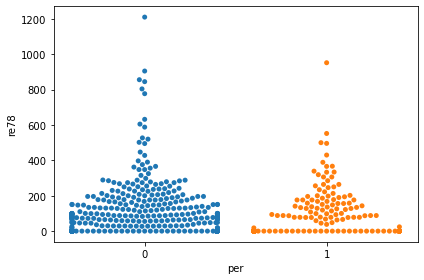

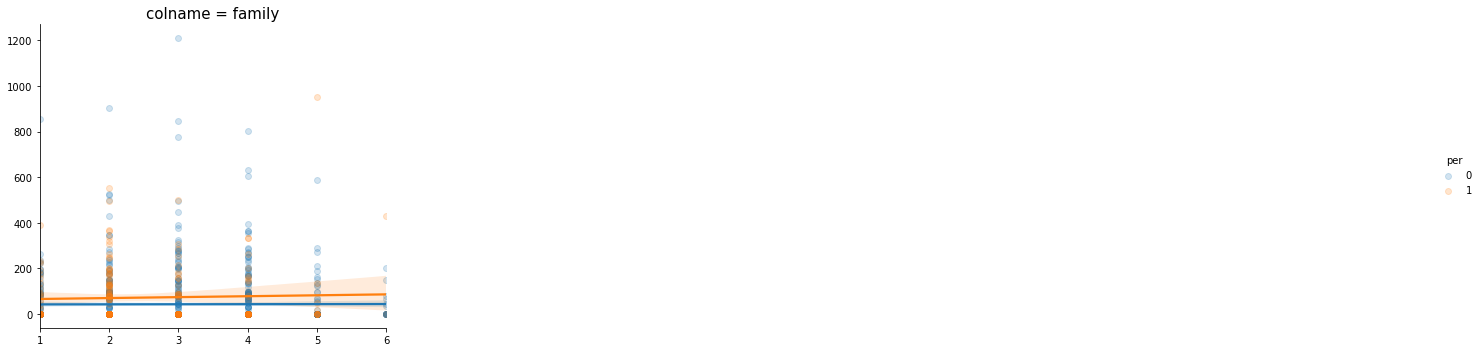

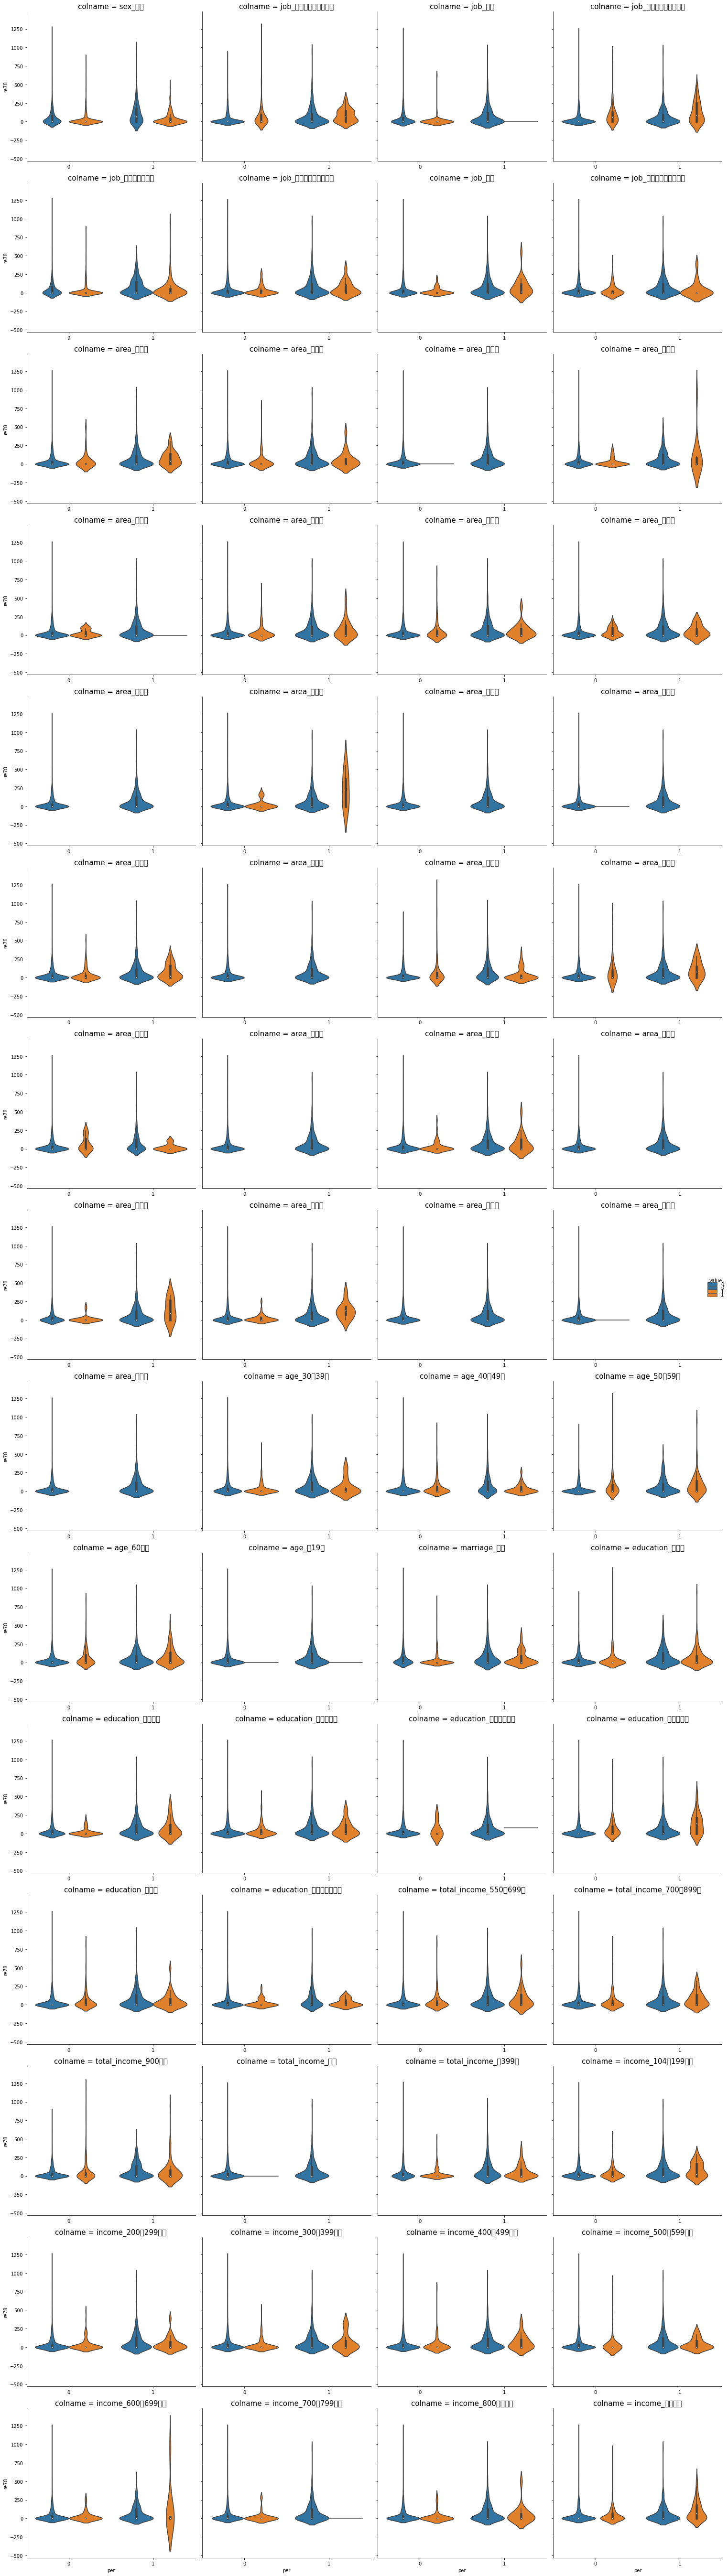

In [ ]:
y_name = 're78'
z_name = 'per'
category_names = ['sex_男性', 'job_パート・アルバイト', 'job_学生', 'job_専業主婦･専業主夫',
       'job_正社員・公務員', 'job_派遣社員・契約社員', 'job_無職', 'job_自営業・個人事業主', 'area_京　都',
       'area_兵　庫', 'area_北海道', 'area_千　葉', 'area_和歌山', 'area_埼　玉', 'area_大　阪',
       'area_奈　良', 'area_宮　城', 'area_岐　阜', 'area_岡　山', 'area_徳　島', 'area_愛　知',
       'area_新　潟', 'area_東　京', 'area_栃　木', 'area_滋　賀', 'area_熊　本', 'area_神奈川',
       'area_福　岡', 'area_群　馬', 'area_茨　城', 'area_長　野', 'area_静　岡', 'area_高　知',
       'age_30～39才', 'age_40～49才', 'age_50～59才', 'age_60才～', 'age_～19才',
       'marriage_未婚', 'education_大学卒', 'education_大学院卒', 'education_専門学校卒',
       'education_小・中学校卒', 'education_短期大学卒', 'education_高校卒',
       'education_高等専門学校卒', 'total_income_550～699万', 'total_income_700～899万',
       'total_income_900万～', 'total_income_不明', 'total_income_～399万',
       'income_104～199万円', 'income_200～299万円', 'income_300～399万円',
       'income_400～499万円', 'income_500～599万円', 'income_600～699万円',
       'income_700～799万円', 'income_800万円以上', 'income_収入無し']
numeric_names = ['family']
plot_treat_in_target(
    target_data=dat.copy(),
    y_name=y_name,
    z_name=z_name,
    category_names = category_names,
    numeric_names = numeric_names,
    n_threshold=1000,
    image_base_file_path=image_dir_path.joinpath('nsw')
)

/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28961 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32887 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-p

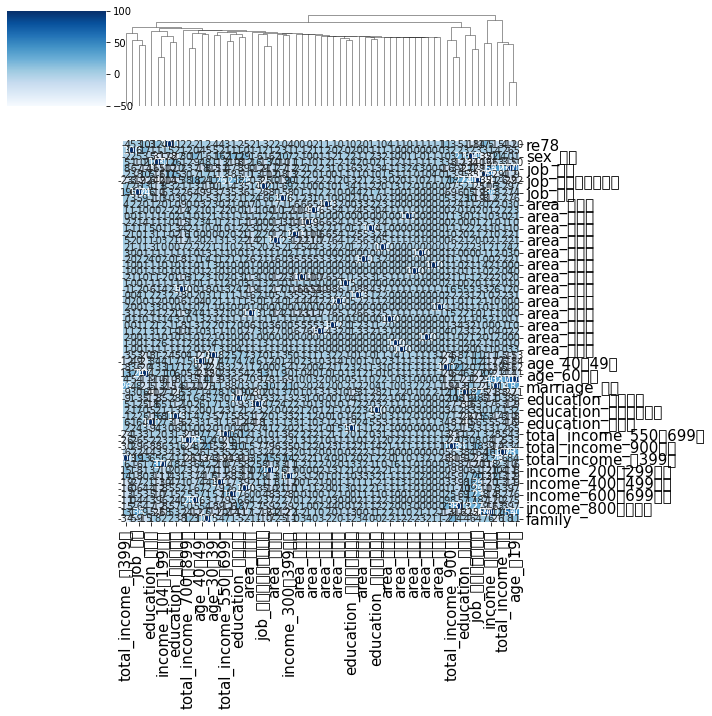

In [ ]:
plot_corr(
    dat >> select([y_name, z_name] + category_names + numeric_names),
    image_file_path=image_dir_path.joinpath('nsw_corr.png')
)


In [ ]:
result_nsw = nswdw_data >> group_by(X.treat) >> summarise(
    n=X.treat.count(),
    re78_mean=X.re78.mean().round().astype(int),
    re78_median=X.re78.median().round().astype(int),
    re78_std=X.re78.std().round().astype(int)
) >> mutate(treat=X.treat.astype(int))
result_nsw

AttributeError: 'DataFrame' object has no attribute 'treat'

In [ ]:
y_name = 're78'
z_name = 'per'
x_names = ['sex_男性', 'job_パート・アルバイト', 'job_学生', 'job_専業主婦･専業主夫',
       'job_正社員・公務員', 'job_派遣社員・契約社員', 'job_無職', 'job_自営業・個人事業主', 'area_京　都',
       'area_兵　庫', 'area_北海道', 'area_千　葉', 'area_和歌山', 'area_埼　玉', 'area_大　阪',
       'area_奈　良', 'area_宮　城', 'area_岐　阜', 'area_岡　山', 'area_徳　島', 'area_愛　知',
       'area_新　潟', 'area_東　京', 'area_栃　木', 'area_滋　賀', 'area_熊　本', 'area_神奈川',
       'area_福　岡', 'area_群　馬', 'area_茨　城', 'area_長　野', 'area_静　岡', 'area_高　知',
       'age_30～39才', 'age_40～49才', 'age_50～59才', 'age_60才～', 'age_～19才',
       'marriage_未婚', 'education_大学卒', 'education_大学院卒', 'education_専門学校卒',
       'education_小・中学校卒', 'education_短期大学卒', 'education_高校卒',
       'education_高等専門学校卒', 'total_income_550～699万', 'total_income_700～899万',
       'total_income_900万～', 'total_income_不明', 'total_income_～399万',
       'income_104～199万円', 'income_200～299万円', 'income_300～399万円',
       'income_400～499万円', 'income_500～599万円', 'income_600～699万円',
       'income_700～799万円', 'income_800万円以上', 'income_収入無し','family']

In [ ]:
target_data = nswdw_data >> select([y_name, z_name] + x_names)

model = sm.OLS(target_data[y_name], target_data.drop(columns=y_name))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   re78   R-squared (uncentered):                   0.239
Model:                            OLS   Adj. R-squared (uncentered):              0.230
Method:                 Least Squares   F-statistic:                              27.90
Date:                Thu, 06 May 2021   Prob (F-statistic):                   3.45e-275
Time:                        18:00:51   Log-Likelihood:                         -33547.
No. Observations:                5572   AIC:                                  6.722e+04
Df Residuals:                    5510   BIC:                                  6.763e+04
Df Model:                          62                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
per                      13.0092      7.089      1.835      0.067      -0.887      26.905
sex_男性                  -19.8949      3.560     -5.588      0.000     -26.874     -12.915
job_パート・アルバイト             8.8216     10.629      0.830      0.407     -12.015      29.659
job_学生                   21.9100     17.760      1.234      0.217     -12.907      56.727
job_専業主婦･専業主夫            32.5582     17.362      1.875      0.061      -1.479      66.595
job_正社員・公務員             -15.2987     10.913     -1.402      0.161     -36.692       6.095
job_派遣社員・契約社員           -21.7125     11.493     -1.889      0.059     -44.243       0.818
job_無職                   11.1601     17.930      0.622      0.534     -23.991      46.311
job_自営業・個人事業主           -10.7235     12.192     -0.880      0.379     -34.624      13.177
area_京　都                 14.7436     11.423      1.291      0.197      -7.649      37.137
area_兵　庫                  0.2352      9.993      0.024      0.981     -19.355      19.826
area_北海道                 14.5990     58.672      0.249      0.804    -100.422     129.620
area_千　葉                  7.5664      9.946      0.761      0.447     -11.931      27.064
area_和歌山                 20.3584     17.810      1.143      0.253     -14.556      55.273
area_埼　玉                  6.6552      9.757      0.682      0.495     -12.473      25.783
area_大　阪                 14.3066      9.627      1.486      0.137      -4.566      33.180
area_奈　良                  8.4010     13.299      0.632      0.528     -17.670      34.472
area_宮　城                  4.6396     71.561      0.065      0.948    -135.648     144.927
area_岐　阜                  2.8203     12.095      0.233      0.816     -20.890      26.531
area_岡　山                -68.7206    100.757     -0.682      0.495    -266.244     128.803
area_徳　島                  6.8918    100.881      0.068      0.946    -190.875     204.659
area_愛　知                  8.9362      9.725      0.919      0.358     -10.128      28.001
area_新　潟                -15.3246     71.661     -0.214      0.831    -155.809     125.160
area_東　京                 12.6392      9.305      1.358      0.174      -5.603      30.881
area_栃　木                 13.8390     12.428      1.114      0.266     -10.524      38.202
area_滋　賀                  7.6317     14.187      0.538      0.591     -20.181      35.444
area_熊　本                -60.6395    100.794     -0.602      0.547    -258.235     136.956
area_神奈川                  0.1107      9.550      0.012      0.991     -18.611      18.832
area_福　岡                110.8142     45.812      2.419      0.016      21.005     200.624
area_群　馬                 -3.7274     12.149     -0.307      0.759     -27.545      20.090
area_茨　城      

/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


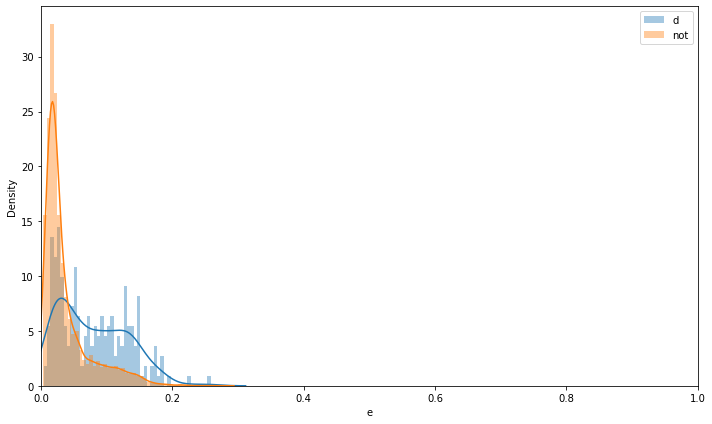

In [ ]:
z_name = 'per'
X_names = list(filter(lambda x: x != y_name and x != z_name, target_data.columns))

plt.figure(figsize=(10, 6))
ps_score_data_nsw = make_ps_score_data(
    X_data=nswdw_data >> select(X_names),
    z_data=nswdw_data[z_name]
)
sns.distplot(ps_score_data_nsw.loc[ps_score_data_nsw['z'] == 1, 'ps_score'], label='d', bins=50)
sns.distplot(ps_score_data_nsw.loc[ps_score_data_nsw['z'] == 0, 'ps_score'], label='not', bins=50)
plt.legend()
plt.xlabel('e')
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(image_dir_path.joinpath('ps_score_distibution_nsw.png'))

/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-p

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.805
Date:                Thu, 06 May 2021   Prob (F-statistic):             0.0164
Time:                        18:01:00   Log-Likelihood:                -2680.2
No. Observations:                 434   AIC:                             5364.
Df Residuals:                     432   BIC:                             5373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.2442      7.917      5.714      0.000      29.683      60.806
z             26.9770     11.197      2.409      0.016       4.970      48.984
==============================================================================
Omnibus:                      327.269   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4523.231
Skew:                           3.200   Prob(JB):                         0.00
Kurtosis:                      17.463   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30007 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/ma

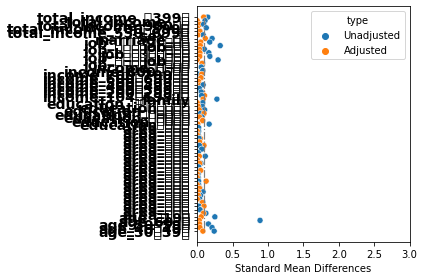

In [ ]:
target_data = nswdw_data >> select(~X.code)

results, matched_ps_data = get_matched_propensity_score(
    target_data=target_data.copy(),
    y_name=y_name,
    z_name=z_name,
    x_names=x_names,
    threshold=0.2,
    flag_covariate_barance=True,
    covariate_balance_threshold=0.1
)

results

/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-p

  estimate      value
0      ATT  11.055753
1      ATU   9.311606


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3526
Date:                Thu, 06 May 2021   Prob (F-statistic):              0.553
Time:                        18:01:05   Log-Likelihood:                -3806.6
No. Observations:                 548   AIC:                             7617.
Df Residuals:                     546   BIC:                             7626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4938     14.958      4.713      0.000      41.112      99.875
z              9.5461     16.075      0.594      0.553     -22.031      41.123
==============================================================================
Omnibus:                      518.343   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21294.878
Skew:                           4.098   Prob(JB):                         0.00
Kurtosis:                      32.418   Cond. No.                         5.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Natsuki1/opt/anaconda3/lib/python3.8/site-p

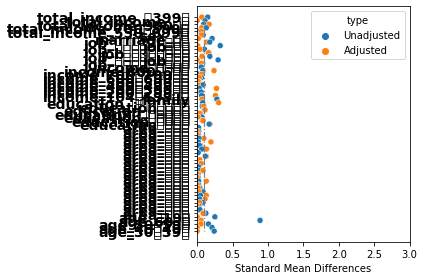

In [ ]:
results, ipw_data, results_other = get_ipw(
    target_data=nswdw_data.copy(),
    y_name=y_name,
    z_name=z_name,
    x_names=x_names,
    ps_score_max=0.9,
    ps_score_min=0.1,
    flag_covariate_balance=True, 
    covariate_balance_threshold=0.1
)
print(results_other)
results